## Logistic Regression

- In statistics, the logistic model (or logit model) is a statistical model that is usually taken to apply to a binary dependent variable. 
- In regression analysis, logistic regression or logit regression is estimating the parameters of a logistic model. 
 [More](https://en.wikipedia.org/wiki/Logistic_regression)
- Logistic regression is used to describe data and to explain the relationship between one dependent binary or dichotomous variable and one or more nominal, ordinal, interval or ratio-level independent variables.
- In logistic regression, the dependent variable is binary or dichotomous, i.e. it only contains data coded as 1 (TRUE, success, pregnant, etc.) or 0 (FALSE, failure, non-pregnant, etc.).
- Logistic regression generates the coefficients (and its standard errors and significance levels) of a formula to predict a logit transformation of the probability of presence of the characteristic of interest:
![](./LR.png)

### For more details refer my blog [here](https://www.vaishalilambe.com)

### Lets see how it works with random data generation

#### Using Scikit Learn

In [19]:
from sklearn.linear_model import LogisticRegression
import numpy as np

clf1 = LogisticRegression(penalty='l2',C=1e9) # very weak l2-regularization
y = np.zeros(1000)
y[500:] = 1.

x1 = np.linspace(0,1,2000)
x1[1000:] = np.linspace(0,1,1000)
x1[1500:] = np.linspace(0,1,500)
x1 = x1.reshape((1000,2))

x2 = np.ones((2000, 1))
x2[500:] = np.full((1500,1), -3)
x2[1000:] = np.full((1000,1), -1)
x2 = x2.reshape(1000,2)

x3 = np.random.randint(0,100,2000).reshape(1000,2)


for dataset in [x1,x2,x3]:
    for i in range(2):
            print ("Logistic Regression: ", round(clf1.fit(dataset,y).score(dataset,y),3))


Logistic Regression:  1.0
Logistic Regression:  1.0
Logistic Regression:  0.5
Logistic Regression:  0.5
Logistic Regression:  0.514
Logistic Regression:  0.514


#### Using theano.Tensor

In [20]:
import numpy
import theano
import theano.tensor as T
rng = numpy.random

N = 400
feats = 784
D = (rng.randn(N, feats), rng.randint(size=N, low=0, high=2))
training_steps = 10000

# Declare Theano symbolic variables
x = T.matrix("x")
y = T.vector("y")
w = theano.shared(rng.randn(feats), name="w")
b = theano.shared(0., name="b")
print("Initial model:")
print(w.get_value())
print(b.get_value())

# Construct Theano expression graph
p_1 = 1 / (1 + T.exp(-T.dot(x, w) - b))   # Probability that target = 1
prediction = p_1 > 0.5                    # The prediction thresholded
xent = -y * T.log(p_1) - (1-y) * T.log(1-p_1) # Cross-entropy loss function
cost = xent.mean() + 0.01 * (w ** 2).sum()# The cost to minimize
gw, gb = T.grad(cost, [w, b])             # Compute the gradient of the cost
                                          # (we shall return to this in a
                                          # following section of this tutorial)

# Compile
train = theano.function(
          inputs=[x,y],
          outputs=[prediction, xent],
          updates=((w, w - 0.1 * gw), (b, b - 0.1 * gb)))
predict = theano.function(inputs=[x], outputs=prediction)

# Train
for i in range(training_steps):
    pred, err = train(D[0], D[1])

print("Final model:")
print(w.get_value())
print(b.get_value())
print("target values for D:")
print(D[1])
print("prediction on D:")
print(predict(D[0]))

Initial model:
[ 1.64047844e+00 -4.81994517e-01  4.41019536e-01 -5.84647005e-01
 -2.49986601e-01  5.93661962e-01 -1.71276791e-01 -4.67607235e-01
 -1.20117477e+00  2.72899812e-01  1.78929510e+00  1.56215834e-01
 -7.21836171e-01 -4.50860702e-01 -1.74136594e+00 -8.49375650e-01
  5.42138486e-01 -6.64274979e-01  9.54770135e-02  1.44837975e-01
  5.16730967e-01  1.40393291e+00 -2.84511712e-01  1.19928548e+00
  1.22752989e+00 -5.51905090e-01 -1.20545712e+00 -1.42479217e-01
  1.32466562e+00  4.88141844e-01 -5.60850523e-01 -7.01778701e-01
 -3.49610900e-01 -6.42670024e-01  2.22087525e-01  1.38117894e+00
  1.07573837e+00 -2.12864112e-02 -9.79670324e-01  1.09031169e+00
 -1.16767954e-01 -7.26359542e-01 -1.72760543e+00 -9.76469753e-02
 -3.19967359e-01 -1.28598589e+00 -1.48007168e+00  8.29704000e-01
  1.07606429e-01 -6.78366774e-01  6.51192224e-01  1.33917110e-01
  1.18655019e+00  5.61706177e-01 -7.39704351e-01  1.04739892e-01
  6.85090946e-02  1.14526811e+00 -1.06807233e+00  7.72125122e-01
  6.737296

Final model:
[-0.09173154 -0.10877711  0.10499131 -0.03154551 -0.05508796 -0.05543443
 -0.11544347 -0.116399   -0.0664053   0.00066984 -0.01223363  0.08652811
 -0.0041002  -0.10418555 -0.08764236 -0.08475434 -0.20822515 -0.03551689
 -0.09348714  0.06699744 -0.04290784 -0.08402953 -0.16189063 -0.22224539
  0.07785754 -0.0513885  -0.04407324  0.15188824  0.02285953  0.03103061
  0.08231723  0.03676593  0.08520006  0.12550805 -0.05877756  0.1903799
 -0.08389776  0.05029488  0.05814087  0.15653955 -0.13939119 -0.06942138
 -0.0316577   0.02725184 -0.09316351  0.02288952  0.00160791  0.09480763
 -0.13019046  0.01822936 -0.13110487 -0.04190126 -0.12689235 -0.05844928
  0.04142964 -0.00993344 -0.02400879  0.16849085 -0.15748702  0.00840998
 -0.0238996   0.00189324 -0.09700619 -0.17366248  0.0888514   0.06713423
 -0.19261074  0.01733177 -0.0041465   0.11464587 -0.03682766 -0.03184685
 -0.03400276  0.0024083   0.02641044 -0.0994153  -0.05167606 -0.22234325
  0.09798095 -0.1276081  -0.12625977 -0

### Logistic Regression 3-Class Classifier in Scikit-learn

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

In [22]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

In [23]:
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [24]:
LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [25]:
#Plot the decision boundary
# For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x_ = np.arange(x_min, x_max, h)
y_ = np.arange(y_min, y_max, h)
xx, yy = np.meshgrid(x_, y_)
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

In [26]:
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []
    
    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
        
    return pl_colorscale

cmap = matplotlib_to_plotly(plt.cm.Paired, 4)

In [27]:
Z = Z.reshape(xx.shape)

trace = go.Heatmap(x=x_, y=y_, z=Z,
                   colorscale=cmap,
                   showscale=False,
                  )

In [28]:

trace1 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    marker=dict(color=X[:, 0],
                                colorscale=cmap,
                                showscale=False,
                                line=dict(color='black', width=1))
                   )

In [29]:
layout = go.Layout(xaxis=dict(title='Sepal length', ticks='',
                              showticklabels=False),
                   yaxis=dict(title='Sepal width', ticks='',
                              showticklabels=False)
                  )

fig = go.Figure(data=[trace, trace1], layout=layout)

#### Logistic Regression for Iris dataset


In [30]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV

In [31]:
#Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

#Check the shape of data
print (X_iris.shape)
print (y_iris.shape)

#Check if sets balanced
print ('Test  1: {}, 2: {}, 3: {}'.format(np.sum(y_iris == 0), np.sum(y_iris == 1), np.sum(y_iris == 2) ) )
print ('Train 1: {}, 2: {}, 3: {}'.format(np.sum(y_iris == 0), np.sum(y_iris == 1), np.sum(y_iris == 2) ) )


(150, 4)
(150,)
Test  1: 50, 2: 50, 3: 50
Train 1: 50, 2: 50, 3: 50


In [32]:
#Create separate each feature array
a = X_iris[:,0]
b = X_iris[:,1]
c = X_iris[:,2]
d = X_iris[:,3]


#Scale X data
scaler = StandardScaler()
scaler.fit_transform (X_iris,y_iris)
X_scaled = scaler.transform (X_iris)


#Make modified features sets with squares of each feature
X_squares   =  np.vstack (([a**2], [b**2], [c **2], [d**2])).T

#Make modified features set with multiplied pairs of each feature
X_multi = np.vstack ((a*b, a*c, a*d, b*c, b*d, c*d)).T

#Make polynomial transformation n = 10
transform = PolynomialFeatures(10)
transform.fit_transform(X_iris)
X_poly = transform.transform(X_iris)


In [33]:
#Make split for original data
(X_tr_o, X_ts_o, y_tr_o, y_ts_o ) = train_test_split(X_iris, y_iris, stratify=y_iris, test_size= 0.3)

#Make split for scaled data
(X_tr_sc, X_ts_sc, y_tr_sc, y_ts_sc) = train_test_split(X_scaled, y_iris, stratify = y_iris, test_size = 0.30)

#Make split of polynomial extended features set
(X_tr_p, X_ts_p, y_tr_p, y_ts_p ) = train_test_split(X_poly, y_iris, stratify=y_iris, test_size= 0.3)

#Make split of squares of each feature
(X_tr_sq, X_ts_sq, y_tr_sq, y_ts_sq ) = train_test_split(X_squares, y_iris, stratify = y_iris, test_size = 0.3)

#Make split of  multyplied pairs of each feature
(X_tr_m, X_ts_m, y_tr_m, y_ts_m ) = train_test_split(X_multi, y_iris, stratify = y_iris, test_size = 0.3)

In [34]:
#Create estimator class
estimator = LogisticRegression()

#Create param grid
paramgrid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1','l2']}

#Create SearchGridCV optimizer
optimizer = GridSearchCV(estimator, paramgrid, cv=10)

#Fit it for original data
optimizer.fit(X_tr_o, y_tr_o)
predict = optimizer.best_estimator_.predict(X_ts_o)
z_o = accuracy_score(y_ts_o,predict)

#Fit it for scaled data
optimizer.fit(X_tr_sc, y_tr_sc)
predict = optimizer.best_estimator_.predict(X_ts_sc)
z_sc = accuracy_score(y_ts_sc,predict)

#Fit it for  multiplied and squared features set
optimizer.fit(X_tr_p, y_tr_p)
predict = optimizer.best_estimator_.predict(X_ts_p)
z_p = accuracy_score(y_ts_p,predict)

#Fit it for squares only of each feature
optimizer.fit(X_tr_sq, y_tr_sq)
predict = optimizer.best_estimator_.predict(X_ts_sq)
z_sq = accuracy_score(y_ts_sq,predict)

#Fit it for multiplaied pairs of features
optimizer.fit(X_tr_m, y_tr_m)
predict = optimizer.best_estimator_.predict(X_ts_m)
z_m = accuracy_score(y_ts_m,predict)

In [35]:
print ('Accuracy score for original: {}'.format(  z_o) )
print ('Accuracy score for scaled: {}'.format (  z_sc) )
print ('Accuracy score for polynomial: {}'.format( z_p) )
print ('Accuracy score for squares: {}'.format( z_sq) )
print ('Accuracy score for multi: {}'.format(  z_m) )


Accuracy score for original: 0.9555555555555556
Accuracy score for scaled: 0.9555555555555556
Accuracy score for polynomial: 0.9111111111111111
Accuracy score for squares: 0.9777777777777777
Accuracy score for multi: 0.9555555555555556


Commonly, it's looks like polynomial features set give 0.95 accuracy each time, but other sets metrics are different from time to time. Looks, like it's the maximum accuracy possible to achived with Logistic Regression method.

#### With Real dataset - US Adult income kaggle competition [Refer](https://www.kaggle.com/johnolafenwa/us-census-data/kernels)

In [36]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score
import re

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


adult-test.csv
adult-training.csv



In [37]:
training_data = '../input/adult-training.csv'
test_data = '../input/adult-test.csv'
columns = ['Age','Workclass','fnlgwt','Education','Education Num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Country','Above/Below 50K']
train=pd.read_csv(training_data, names=columns)
test=pd.read_csv(test_data, names=columns)

In [38]:
# defining function for estimating missing values in each columns
def missing_value(df):
    miss=[]
    col_list=df.columns
    for i in col_list:
        missing=df[i].isnull().sum()
        miss.append(missing)
        list_of_missing=pd.DataFrame(list(zip(col_list,miss)))
    return list_of_missing

In [39]:
missing_value(test)
missing_value(train)

,0,1
0,Age,0
1,Workclass,0
2,fnlgwt,0
3,Education,0
4,Education Num,0
5,Marital Status,0
6,Occupation,0
7,Relationship,0
8,Race,0
9,Sex,0


In [40]:
train.Relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [41]:
test.Occupation.value_counts()

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 ?                     966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: Occupation, dtype: int64

#### Data Cleaning

In [42]:
print(test.shape)
print(train.shape)


# deleted the firt rows of the both dataframes since these are errorneous
test.drop(test.index[0]).head()
train.drop(train.index[0]).head()

(16282, 15)
(32561, 15)


,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [43]:
# a swiss knife tool for separating string columns to separate list and numerical to separate list
all_data=[train, test]
str_list=[]

for data in all_data:
    for colname, colvalue in data.iteritems(): 
        if type(colvalue[1]) == str:
            str_list.append(colname) 
num_list = data.columns.difference(str_list)

In [44]:
# no null values its good
print(test.isnull().sum())

Age                0
Workclass          1
fnlgwt             1
Education          1
Education Num      1
Marital Status     1
Occupation         1
Relationship       1
Race               1
Sex                1
Capital Gain       1
Capital Loss       1
Hours/Week         1
Country            1
Above/Below 50K    1
dtype: int64


In [45]:
# the code will replace the special character to nan
for data in all_data:
    for i in data.columns:
        data[i].replace(' ?', np.nan, inplace=True)
    data.dropna(inplace=True)
    

In [46]:
test.isnull().sum()

Age                0
Workclass          0
fnlgwt             0
Education          0
Education Num      0
Marital Status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital Gain       0
Capital Loss       0
Hours/Week         0
Country            0
Above/Below 50K    0
dtype: int64

#### Feature engineering
#Creating targer variable

In [47]:
# defining the target variable
for data in all_data:
    data['target']=data['Above/Below 50K'].apply(lambda x: x.replace('.', ''))
    data['target']=data['target'].apply(lambda x: x.strip())
    data['target']=data['target'].apply(lambda x: 1 if x=='>50K' else 0)
    data.drop(['Above/Below 50K'], axis=1, inplace=True)

In [48]:
train.target.sum()/len(train)

0.24892248524633645

Education and number of work hour/week looks to be a great variables deciding income. Lets create categories to further enhance its effect. We will create low, medium and high education. I will derive a generic function for creating bins

In [49]:
#data can be train or test
#var name is variable name: should be passed as strings within ('')
# bins is list of numeric values like [0,6,10,11]
# group names is list of groups you want to create in list form
def bin_var(data, var, bins, group_names):
    bin_value = bins
    group = group_names
    data[var+'Cat'] = pd.cut(train[var], bin_value, labels=group)
    

In [50]:
bin_var(train, 'Education Num', [0,6,11,16], ['Low', 'Medium', 'High'])
bin_var(test, 'Education Num', [0,6,11,16], ['Low', 'Medium', 'High'])

In [51]:
pd.crosstab(train['Education NumCat'],train['target'] )

target,0,1
Education NumCat,,
Low,2179,137
Medium,15865,3385
High,4610,3986


The same way we can bin the Hours/Week variable. Initial exploation suggest that 40 hours is the most fequent value which make sense that it is 8hr/day. Hence we will bin this variable around this value.

In [52]:
bin_var(train, 'Hours/Week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])
bin_var(test, 'Hours/Week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])

In [53]:
pd.crosstab(train['Hours/WeekCat'],train['target'], margins=True)

target,0,1,All
Hours/WeekCat,,,
Low,5369,505,5874
Medium,11829,3262,15091
High,4796,3349,8145
VeryHigh,660,392,1052
All,22654,7508,30162


Classifying the occupation into Highly Skilled and low Skilled

In [54]:
occu=pd.crosstab(train['Occupation'],train['target'], margins=True).reset_index()
def occup(x):
    if re.search('managerial', x):
        return 'Highskill'
    elif re.search('specialty',x):
        return 'Highskill'
    else:
        return 'Lowskill'

In [55]:
train['Occupa_cat']=train.Occupation.apply(lambda x: x.strip()).apply(lambda x: occup(x))
test['Occupa_cat']=test.Occupation.apply(lambda x: x.strip()).apply(lambda x: occup(x))

Same way we can bin the Age variable. The minimum age in train is 17 and max is 90. We can categorize them as young, middle_aged and old

In [56]:
bin_var(test, 'Age', [17,30,55,100], ['Young', 'Middle_aged', 'Old'])
bin_var(train, 'Age', [17,30,55,100], ['Young', 'Middle_aged', 'Old'])

Marital status can also be binned

In [57]:
train['Marital Status_cat']=train['Marital Status'].apply(lambda x: 'married' if x.startswith('Married',1) else 'Single')
test['Marital Status_cat']=test['Marital Status'].apply(lambda x: 'married' if x.startswith('Married',1) else 'Single')

Race has been binned into White and others

In [58]:
pd.crosstab(train['Race'],train['target'], margins=True)

target,0,1,All
Race,,,
Amer-Indian-Eskimo,252,34,286
Asian-Pac-Islander,647,248,895
Black,2451,366,2817
Other,210,21,231
White,19094,6839,25933
All,22654,7508,30162


In [59]:
train['Race_cat']=train['Race'].apply(lambda x: x.strip())
train['Race_cat']=train['Race_cat'].apply(lambda x: 'White' if x=='White' else 'Other')
test['Race_cat']=test['Race'].apply(lambda x: x.strip())
test['Race_cat']=test['Race_cat'].apply(lambda x: 'White' if x=='White' else 'Other')

Work Class is divided into three categories Private, Selfemployed, gov and others

In [60]:
def workclas(x):
    if re.search('Private', x):
        return 'Private'
    elif re.search('Self', x):
        return 'selfempl'
    elif re.search('gov', x):
        return 'gov'
    else:
        return 'others'

In [61]:
train['WorfClass_cat']=train.Workclass.apply(lambda x: x.strip()).apply(lambda x: workclas(x))
test['WorfClass_cat']=test.Workclass.apply(lambda x: x.strip()).apply(lambda x: workclas(x))

In [62]:
train['WorfClass_cat'].value_counts()

Private     22286
gov          4289
selfempl     3573
others         14
Name: WorfClass_cat, dtype: int64

In [63]:
# assigning the target to Y variable
Y_tr=train['target']
Y_te=test['target']

In [64]:
# since target is already assigned I Will drop the target from the train and test along with other unnecessary variables
train.drop(['Education','Occupation','Race','Education Num','Age', 'Hours/Week', 'Marital Status','target','fnlgwt','Workclass', 'Capital Gain','Capital Loss', 'Country'], axis=1, inplace=True)
test.drop(['Education','Occupation','Race','Education Num','Age', 'Hours/Week', 'Marital Status','Workclass','target','fnlgwt', 'Capital Gain','Capital Loss', 'Country'], axis=1, inplace=True)

In [65]:
str_list=['WorfClass_cat','Education NumCat', 'AgeCat', 'Race_cat',
'Hours/WeekCat',
 'Marital Status_cat',
 'Occupa_cat',
 'Relationship',
 'Sex']

train_set=pd.get_dummies(train, columns=str_list)
test_set=pd.get_dummies(test, columns=str_list)

Feature Selection Using Variance Threshold

Variance Threshold is a univariate approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples. As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by The below approach removes variable which have more than 80% values are either 0 or 1

In [66]:
train_set.columns

Index(['WorfClass_cat_Private', 'WorfClass_cat_gov', 'WorfClass_cat_others',
       'WorfClass_cat_selfempl', 'Education NumCat_Low',
       'Education NumCat_Medium', 'Education NumCat_High', 'AgeCat_Young',
       'AgeCat_Middle_aged', 'AgeCat_Old', 'Race_cat_Other', 'Race_cat_White',
       'Hours/WeekCat_Low', 'Hours/WeekCat_Medium', 'Hours/WeekCat_High',
       'Hours/WeekCat_VeryHigh', 'Marital Status_cat_Single',
       'Marital Status_cat_married', 'Occupa_cat_Highskill',
       'Occupa_cat_Lowskill', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Other-relative',
       'Relationship_ Own-child', 'Relationship_ Unmarried',
       'Relationship_ Wife', 'Sex_ Female', 'Sex_ Male'],
      dtype='object')

In [67]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_select(df, thresh=0.0, na_replacement=-999):
    df1 = df.copy(deep=True) # Make a deep copy of the dataframe
    selector = VarianceThreshold(thresh) # passing Threshold
    selector.fit(df1.fillna(na_replacement)) # Fill NA values as VarianceThreshold cannot deal with those
    df2 = df.loc[:,selector.get_support(indices=False)] # Get new dataframe with columns deleted that have NA values
    return df2

In [68]:
df2=variance_threshold_select(train_set, thresh=.8* (1 - .8))

In [69]:
print(df2.columns)

Index(['WorfClass_cat_Private', 'Education NumCat_Medium',
       'Education NumCat_High', 'AgeCat_Young', 'AgeCat_Middle_aged',
       'Hours/WeekCat_Medium', 'Hours/WeekCat_High',
       'Marital Status_cat_Single', 'Marital Status_cat_married',
       'Occupa_cat_Highskill', 'Occupa_cat_Lowskill', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Sex_ Female', 'Sex_ Male'],
      dtype='object')


As you can see below the number of columns have been reduced to 15 because of the the variance threshold. The removed columns have the same value in 80% of the observations

In [70]:
col_tr=df2.columns # creates list of columns
col_te=test_set.columns # creates list of columns for test
X_tr=df2.values # creates array of values of features
X_te=test_set[col_tr].values#subseting the test dataset to get the same variable as train and

In [71]:
len(col_tr)

15

#### Modelling

In [72]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
#    else:
#        print('Confusion matrix, without normalization')

#    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision =     {:.3f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.3f}'.format(tp/(tp+fn)))
        print('Fallout (FPR) = {:.3e}'.format(fp/(fp+tn)))
    return tp/(tp+fp), tp/(tp+fn), fp/(fp+tn)

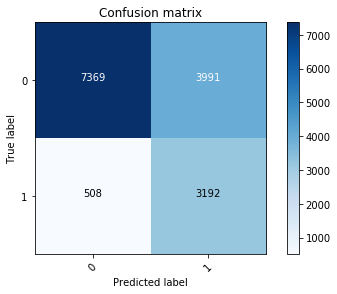

Precision =     0.444
Recall (TPR) =  0.863
Fallout (FPR) = 3.513e-01


In [73]:
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_tr, Y_tr)
y_pred = lrn.predict(X_te)
cm = confusion_matrix(Y_te, y_pred)
if lrn.classes_[0] == 1:
    cm = np.array([[cm[1,1], cm[1,0]], [cm[0,1], cm[0,0]]])

plot_confusion_matrix(cm, ['0', '1'], )
pr, tpr, fpr = show_data(cm, print_res = 1);

In [74]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
    
print ('Accuracy:', accuracy_score(Y_te, y_pred))
print ('F1 score:', f1_score(Y_te,y_pred))

Accuracy: 0.701261620185923
F1 score: 0.5866029587429936


Understanding Important features for High and Low Paying Jobs

In [75]:
# Understanding the coefficients
coff=pd.DataFrame(lrn.coef_).T 
col=pd.DataFrame(col_tr).T 
print(coff)
print(col)

           0
0   0.000000
1   0.000000
2   0.560646
3  -0.275337
4   0.001473
5   0.000000
6   0.078815
7  -0.967225
8   0.549511
9   0.102070
10 -0.262941
11  0.000000
12  0.000000
13  0.000000
14  0.000000
                      0                        1                      2   \
0  WorfClass_cat_Private  Education NumCat_Medium  Education NumCat_High   

             3                   4                     5                   6   \
0  AgeCat_Young  AgeCat_Middle_aged  Hours/WeekCat_Medium  Hours/WeekCat_High   

                          7                           8   \
0  Marital Status_cat_Single  Marital Status_cat_married   

                     9                    10                     11  \
0  Occupa_cat_Highskill  Occupa_cat_Lowskill  Relationship_ Husband   

                            12           13         14  
0  Relationship_ Not-in-family  Sex_ Female  Sex_ Male  


As you can see above positive coefficients are for high paying and neagtive for low paying.As you can see High number of years of education, high workhour/week are importand for getting high salary and vice versa

In [76]:
from sklearn.feature_selection import RFE, f_regression
#stop the search when only the last feature is left
rfe = RFE(lrn, n_features_to_select=10, verbose =3 )
rfe.fit(X_tr,Y_tr)
list(zip(map(lambda x: round(x, 4), rfe.ranking_), col_tr))

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


[(6, 'WorfClass_cat_Private'),
 (5, 'Education NumCat_Medium'),
 (1, 'Education NumCat_High'),
 (1, 'AgeCat_Young'),
 (1, 'AgeCat_Middle_aged'),
 (4, 'Hours/WeekCat_Medium'),
 (1, 'Hours/WeekCat_High'),
 (1, 'Marital Status_cat_Single'),
 (1, 'Marital Status_cat_married'),
 (1, 'Occupa_cat_Highskill'),
 (2, 'Occupa_cat_Lowskill'),
 (3, 'Relationship_ Husband'),
 (1, 'Relationship_ Not-in-family'),
 (1, 'Sex_ Female'),
 (1, 'Sex_ Male')]